In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
dff = pd.read_csv("bangladesh_landslides.csv")
df = pd.DataFrame(dff)

In [63]:
print(df.head())

    Location  Date  Rainfall Soil_Type  Slope  Population_Density  \
0  Bandarban    12      0.35  Regolith    3.5               16200   
1  Bandarban    12      6.00  Regolith    3.5               16200   
2  Bandarban    12      6.00  Regolith    3.5               16200   
3  Bandarban    12      0.10  Regolith    3.5               16200   
4  Bandarban    12      0.10  Regolith    3.5               16200   

   days_since_last_rain  Landslide_Occurrence  Year  
0                    12                     2  1975  
1                    12                     1  1975  
2                    12                     5  1965  
3                    12                     3  1935  
4                    12                     4  1946  


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              29 non-null     object 
 1   Date                  29 non-null     int64  
 2   Rainfall              29 non-null     float64
 3   Soil_Type             29 non-null     object 
 4   Slope                 29 non-null     float64
 5   Population_Density    29 non-null     int64  
 6   days_since_last_rain  29 non-null     int64  
 7   Landslide_Occurrence  29 non-null     int64  
 8   Year                  29 non-null     int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.2+ KB
None


In [67]:
#preprocesses
df['Rainfall'] = df['Rainfall'].interpolate()
df = df.dropna(subset=['Location', 'Date'])
encoder = LabelEncoder()
df['Soil_Type'] = encoder.fit_transform(df['Soil_Type'])
df['Date'] = pd.to_datetime(df['Date'])
df['days_since_last_rain'] = (df['Date'] - df['Date'].shift()).dt.days
df['days_since_last_rain'].fillna(df['days_since_last_rain'].median(), inplace=True)
scaler = MinMaxScaler()
df[['Rainfall', 'Slope', 'Population_Density']] = scaler.fit_transform(df[['Rainfall', 'Slope', 'Population_Density']])
print(df.head())

    Location                          Date  Rainfall  Soil_Type  Slope  \
0  Bandarban 1970-01-01 00:00:00.000000012  0.042373          1    0.0   
1  Bandarban 1970-01-01 00:00:00.000000012  1.000000          1    0.0   
2  Bandarban 1970-01-01 00:00:00.000000012  1.000000          1    0.0   
3  Bandarban 1970-01-01 00:00:00.000000012  0.000000          1    0.0   
4  Bandarban 1970-01-01 00:00:00.000000012  0.000000          1    0.0   

   Population_Density  days_since_last_rain  Landslide_Occurrence  Year  
0            0.639301                   0.0                     2  1975  
1            0.639301                   0.0                     1  1975  
2            0.639301                   0.0                     5  1965  
3            0.639301                   0.0                     3  1935  
4            0.639301                   0.0                     4  1946  


C:\Users\eafta\AppData\Local\Temp\ipykernel_10764\1256988627.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_rain'].fillna(df['days_since_last_rain'].median(), inplace=True)


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

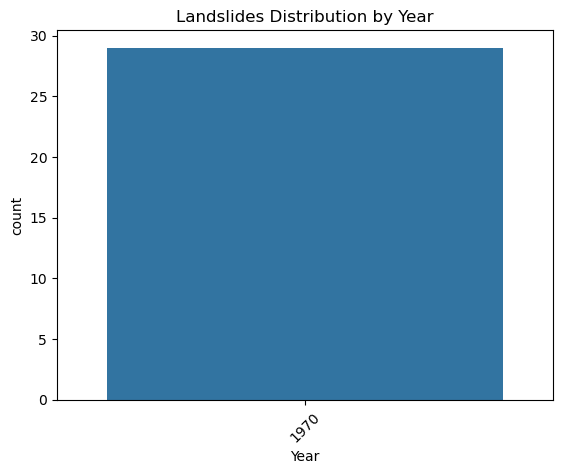

In [71]:
# Distribution of Landslides over the years
df['Year'] = df['Date'].dt.year
sns.countplot(x='Year', data=df)
plt.title('Landslides Distribution by Year')
plt.xticks(rotation=45)
plt.show()

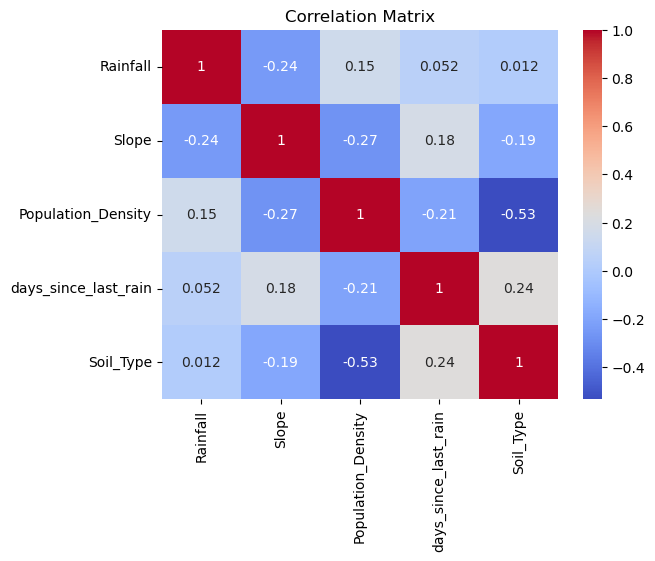

In [72]:
# Correlation heatmap to understand relationships between variables
corr_matrix = df[['Rainfall', 'Slope', 'Population_Density', 'days_since_last_rain', 'Soil_Type']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

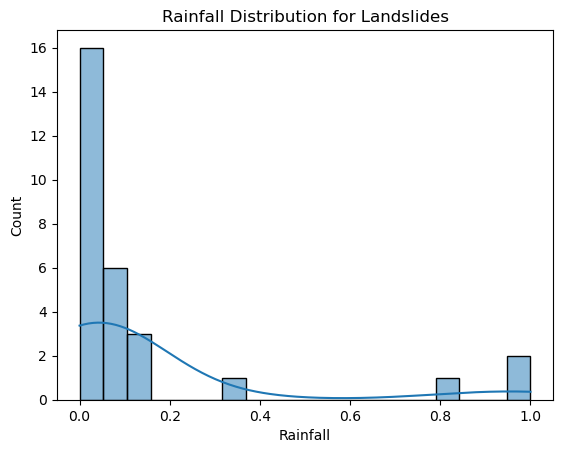

In [74]:
# Landslides by rainfall
sns.histplot(df['Rainfall'], kde=True)
plt.title('Rainfall Distribution for Landslides')
plt.show()

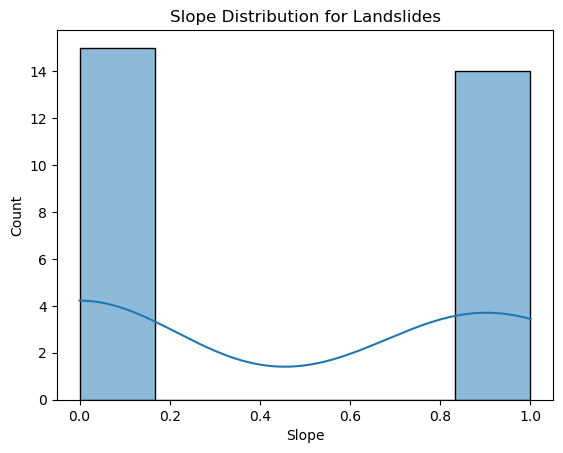

In [75]:
# Landslide Frequency by Slope
sns.histplot(df['Slope'], kde=True)
plt.title('Slope Distribution for Landslides')
plt.show()

In [77]:
# Prepare features and target variable
X = df[['Rainfall', 'Slope', 'Population_Density', 'days_since_last_rain', 'Soil_Type']]
y = df['Landslide_Occurrence'] 

In [79]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [84]:
# Evaluate the model

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame(rf_classifier.feature_importances_,
                                  index=X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0

Feature Importance:
                      importance
Rainfall                0.464539
Population_Density      0.240558
Slope                   0.157783
Soil_Type               0.086713
days_since_last_rain    0.050407


C:\Users\eafta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eafta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eafta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eafta\anaconda3\Lib\site-packages\sklea

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dff = pd.read_csv("Dataset 1 - mm.csv")
df1 = pd.DataFrame(dff)
print(df1.head())

dff = pd.read_csv("Dataset 1 - mm.csv")
df1 = pd.DataFrame(dff)
print(df1.head())

      St_name   JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP   \
0       Dhaka    7.7  28.9  65.8  156.3  339.4  340.4  373.1  316.5  300.4   
1  Mymensingh   10.0  20.5  35.8  128.6  356.9  394.3  436.3  318.1  335.3   
2     Tangail    9.0  33.5  33.1  151.1  258.6  311.2  345.1  253.1  298.1   
3    Faridpur    7.0  27.7  51.1  142.4  267.7  345.1  339.8  308.5  264.2   
4   Madaripur    9.7  34.2  60.9  154.3  264.3  384.3  401.5  351.5  246.5   

    OCT   NOV   DEC   
0  172.3  34.4  12.8  
1  190.9  17.5   8.7  
2  139.7  29.6  12.1  
3  156.1  31.8  11.3  
4  149.6  32.3   5.4  
      St_name   JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP   \
0       Dhaka    7.7  28.9  65.8  156.3  339.4  340.4  373.1  316.5  300.4   
1  Mymensingh   10.0  20.5  35.8  128.6  356.9  394.3  436.3  318.1  335.3   
2     Tangail    9.0  33.5  33.1  151.1  258.6  311.2  345.1  253.1  298.1   
3    Faridpur    7.0  27.7  51.1  142.4  267.7  345.1  339.8  308.5  264.2   
4  

In [89]:
ADDcolumns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
missing_cols = set(ADDcolumns) - set(df1.columns)

if missing_cols:
    print(f"Warning: The following columns are missing: {missing_cols}.  Total will not be calculated accurately.")
    
    for col in missing_cols:
        df1[col] = 0

required_columns = ADDcolumns 
df1['Total'] = 0
for col in required_columns:
    if col in df1.columns:  
        
        df1[col] = pd.to_numeric(df1[col], errors='coerce')
        df1['Total'] += df1[col].fillna(0) 
    else:
        print(f"Warning: Column '{col}' not found. Skipping.")


In [91]:
X = df1.drop('Total', axis=1)  
y = df1['Total']  


for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [93]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


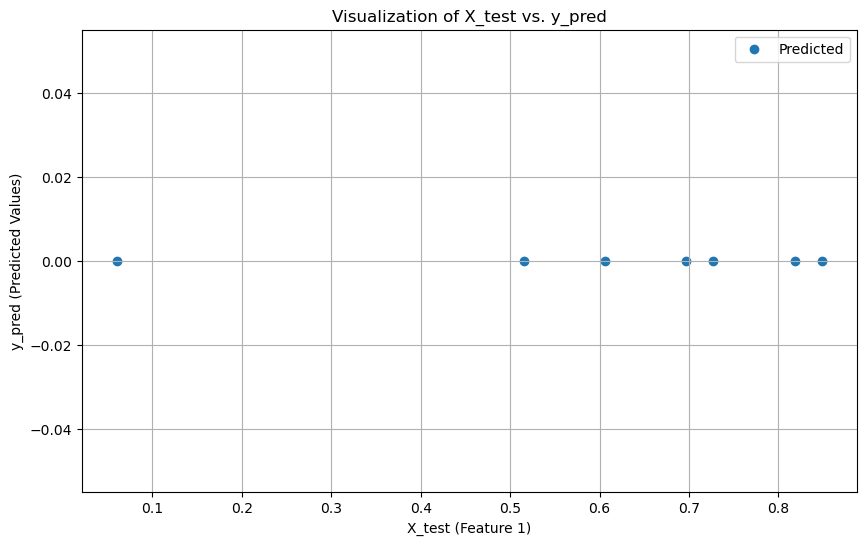

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_pred, label='Predicted') 
plt.xlabel('X_test (Feature 1)')
plt.ylabel('y_pred (Predicted Values)')
plt.title('Visualization of X_test vs. y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_final = accuracy * 100
print(f"Accuracy: {accuracy_final}",'%')

Accuracy: 100.0 %
